In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U ipywidgets
!pip install ultralytics
!pip install roboflow

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 696.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
import os
# code to load the medium weights
model = YOLO('yolov8m.pt')
# Path to save/load the trained model weights
model_weights_path = '/content/drive/MyDrive/V8_2k_model'


100%|██████████| 49.7M/49.7M [00:00<00:00, 493MB/s]


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="GdpQ6ES68AVPdEDR3MQs")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.83, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to road-signs-2 in yolov8:: 100%|██████████| 4198/4198 [00:00<00:00, 6581.58it/s]


In [ ]:
import yaml

# Define the path to the YAML file
yaml_file_path = '/content/road-signs-2/data.yaml'

# Open, modify, and save the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

data['test'] = '/content/road-signs-2/test/images'
data['train'] = '/content/road-signs-2/train/images'
data['val'] = '/content/road-signs-2/valid/images'

with open(yaml_file_path, 'w') as file:
    yaml.safe_dump(data, file, sort_keys=False)

print("YAML file has been updated successfully.")


YAML file has been updated successfully.


In [ ]:
# Train the model
results = model.train(data='/content/road-signs-2/data.yaml', epochs=50, imgsz=640)



Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/road-signs-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 100MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 405MB/s]


AMP: checks passed ✅


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/road-signs-2/train/labels... 1376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1376/1376 [00:00<00:00, 1460.21it/s]

train: New cache created: /content/road-signs-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/road-signs-2/valid/labels... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<00:00, 1188.09it/s]


val: New cache created: /content/road-signs-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.95G      1.027      3.044      1.285         28        640: 100%|██████████| 86/86 [00:49<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        488        529      0.549      0.571      0.566      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       6.9G     0.9525      1.764      1.202         29        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.42it/s]


                   all        488        529      0.475      0.669      0.604      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.89G     0.9557      1.502      1.185         29        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529      0.703      0.571      0.663      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.87G     0.9302      1.355      1.172         33        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        488        529      0.735      0.691      0.786      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.87G     0.8887      1.167      1.134         33        640: 100%|██████████| 86/86 [00:46<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        488        529      0.721      0.728        0.8      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.88G     0.8798      1.095      1.122         32        640: 100%|██████████| 86/86 [00:46<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.44it/s]

                   all        488        529      0.859      0.815      0.864      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.87G     0.8765     0.9971      1.106         31        640: 100%|██████████| 86/86 [00:48<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

                   all        488        529      0.842      0.826      0.865        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.87G       0.86     0.9791      1.105         36        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]

                   all        488        529      0.805      0.854      0.881      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.87G     0.8535      0.922      1.092         34        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]

                   all        488        529      0.868      0.891      0.914      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.87G     0.7986     0.8335      1.066         30        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]

                   all        488        529       0.85      0.771       0.85      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.87G     0.8141     0.8569      1.075         31        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.34it/s]

                   all        488        529       0.87      0.868      0.911      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.87G      0.815     0.7961      1.091         25        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        488        529      0.909      0.862       0.92      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.88G     0.7902     0.7614      1.053         30        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529       0.89      0.861      0.928      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.85G     0.7906     0.7512      1.063         35        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        488        529       0.92      0.889      0.925      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.87G     0.7696      0.723      1.051         39        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529      0.915      0.852      0.922      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.87G     0.7711     0.7048      1.047         38        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        488        529      0.934      0.894      0.941       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.88G     0.7542     0.6929      1.035         34        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.39it/s]


                   all        488        529      0.933      0.881      0.937      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.85G     0.7487     0.6654      1.034         28        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]

                   all        488        529      0.933       0.89      0.943      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.86G     0.7293     0.6499       1.03         40        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]

                   all        488        529      0.952      0.925      0.952      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.86G     0.7409      0.669      1.041         31        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]

                   all        488        529      0.936      0.932      0.962        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.87G     0.7323     0.6293      1.028         33        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]

                   all        488        529      0.918      0.936      0.953      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.87G      0.716     0.6064      1.019         34        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]

                   all        488        529      0.928      0.916      0.951      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.86G     0.7175     0.6044      1.027         29        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.35it/s]

                   all        488        529      0.917      0.904      0.945      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.87G     0.6997     0.6083      1.022         38        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]

                   all        488        529      0.919      0.924      0.953      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.87G     0.6811     0.5533      1.002         36        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529      0.926      0.943      0.957      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.86G     0.6981     0.5762      1.012         33        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]


                   all        488        529      0.928      0.923      0.944      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.88G     0.6811     0.5487      1.008         34        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]

                   all        488        529      0.928      0.908      0.932      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.86G     0.6626     0.5425     0.9928         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

                   all        488        529      0.929      0.928      0.944      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.86G     0.6421     0.5266     0.9913         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]

                   all        488        529      0.925      0.919      0.945      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.86G     0.6516     0.5243     0.9898         29        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.33it/s]

                   all        488        529      0.928      0.916      0.946      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.87G     0.6481     0.5124     0.9906         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529      0.922      0.925      0.947      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.86G     0.6227      0.484     0.9767         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        488        529      0.941      0.947      0.962      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.85G     0.6352     0.4857     0.9846         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]

                   all        488        529      0.947      0.935      0.961      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.85G     0.6266     0.4762     0.9855         24        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]

                   all        488        529      0.939      0.918      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.85G     0.6104     0.4586     0.9775         30        640: 100%|██████████| 86/86 [00:46<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.50it/s]

                   all        488        529      0.931      0.951      0.965      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.85G     0.6005     0.4485     0.9769         33        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]


                   all        488        529      0.953       0.93      0.969      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.86G     0.5911     0.4485       0.97         45        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.32it/s]

                   all        488        529      0.949      0.929      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.85G     0.5813      0.437     0.9635         32        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.46it/s]


                   all        488        529      0.935      0.938       0.96      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.86G     0.5729     0.4307     0.9575         28        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.47it/s]

                   all        488        529      0.952       0.93      0.958      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.85G      0.566     0.4165     0.9643         47        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]


                   all        488        529      0.943      0.936      0.964      0.823
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.84G     0.4913     0.2885     0.8989         16        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        488        529       0.94      0.963      0.967       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.85G     0.4912     0.2788     0.8943         17        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        488        529      0.937      0.936      0.962      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.85G     0.4742     0.2674     0.8857         18        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.86it/s]


                   all        488        529       0.95      0.941      0.969      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.85G     0.4696      0.265     0.8916         19        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        488        529      0.949      0.954      0.968      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.86G     0.4534     0.2542     0.8758         17        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.16it/s]

                   all        488        529      0.959      0.937      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.85G     0.4444     0.2509     0.8609         16        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        488        529      0.954      0.943      0.969      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.86G     0.4403      0.247     0.8673         16        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]

                   all        488        529      0.954      0.932      0.966      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.85G     0.4253     0.2388     0.8662         16        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.04it/s]

                   all        488        529      0.947      0.945       0.97      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.86G     0.4195     0.2307     0.8625         16        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        488        529      0.966      0.931      0.972      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.85G     0.4086      0.226     0.8511         19        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        488        529      0.957      0.936      0.971      0.832



50 epochs completed in 0.773 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]


                   all        488        529      0.957      0.936      0.971      0.832
          do_not_enter         30         30      0.971          1      0.995      0.935
           do_not_stop         30         30      0.945      0.933      0.972      0.892
         do_not_turn_l         30         34      0.978          1      0.995      0.904
         do_not_turn_r         30         31      0.946      0.968       0.97      0.935
         do_not_u_turn         30         30      0.994      0.967      0.983      0.878
       enter_left_lane         30         30      0.958      0.967      0.987      0.882
           green_light         30         47      0.953      0.868      0.955      0.763
       left_right_lane          9          9      0.956          1      0.995      0.923
            no_parking         30         34       0.88      0.971      0.978       0.84
       ped_zebra_cross         30         36      0.963      0.972      0.994      0.853
      railway_crossin

RuntimeError: File /content/drive/MyDrive/V8_2k_model cannot be opened.

In [ ]:
# Step 2: Import shutil for file operations
import shutil
import os

# Define the paths for the source and destination
source_dir = '/content/runs/detect/train/weights'
destination_dir = '/content/drive/MyDrive/V8_2k_model'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List of weights to be copied
weights_files = ['best.pt', 'last.pt']

# Copy each weights file to Google Drive
for file_name in weights_files:
    src_path = os.path.join(source_dir, file_name)
    dst_path = os.path.join(destination_dir, file_name)
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
        print(f"Copied {file_name} to {destination_dir}")
    else:
        print(f"{file_name} not found in {source_dir}")

print("All specified weights have been copied to Google Drive.")

Copied best.pt to /content/drive/MyDrive/V8_2k_model
Copied last.pt to /content/drive/MyDrive/V8_2k_model
All specified weights have been copied to Google Drive.


In [ ]:
metrics = model.val()  # This method runs the validation process and returns various metrics.

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs


val: Scanning /content/road-signs-2/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:13<00:00,  2.28it/s]


                   all        488        529      0.957      0.936      0.971       0.83
          do_not_enter         30         30      0.971          1      0.995      0.936
           do_not_stop         30         30      0.946      0.933      0.972      0.892
         do_not_turn_l         30         34      0.978          1      0.995      0.904
         do_not_turn_r         30         31      0.946      0.968      0.969      0.932
         do_not_u_turn         30         30      0.995      0.967      0.983      0.874
       enter_left_lane         30         30      0.959      0.967      0.987      0.881
           green_light         30         47      0.953      0.868      0.955      0.765
       left_right_lane          9          9      0.956          1      0.995      0.912
            no_parking         30         34       0.88      0.971      0.978       0.84
       ped_zebra_cross         30         36      0.963      0.972      0.994      0.849
      railway_crossin

In [ ]:
import shutil

# Paths to save results and metrics
results_dir = '/content/runs/detect/train/'
drive_results_dir = '/content/drive/MyDrive/V8_2k_model/Yolo_results'

# Save the evaluation metrics to Google Drive
if not os.path.exists(drive_results_dir):
    os.makedirs(drive_results_dir)

# List of metric images to be saved
list_of_metrics = ["P_curve.png", "R_curve.png", "confusion_matrix.png", "F1_curve.png", "results.png"]

# Copy the images to Google Drive
for metric in list_of_metrics:
    src_path = os.path.join(results_dir, metric)
    dst_path = os.path.join(drive_results_dir, metric)
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)

print("Evaluation metrics saved to Google Drive.")


Evaluation metrics saved to Google Drive.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def detection_pipline(images):
    output = model(images)

    # Visualize the results
    for i, r in enumerate(output):
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()



0: 640x640 1 u_turn, 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


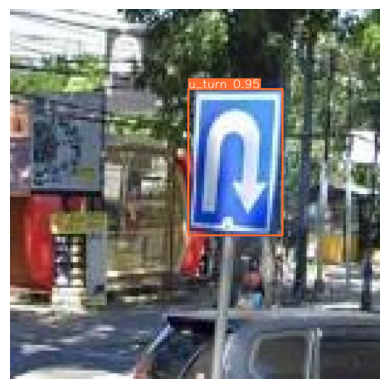

In [ ]:
# Example test images; adjust paths as needed
test_imgs = [
    "/content/petunjuk-lokasi-putar-balik--7-_jpg.rf.88b8f824e1be9f863da496c52de57dc2.jpg"
]
detection_pipline(test_imgs)